In [534]:
import pandas as pd
import numpy as np

In [535]:
data=pd.read_csv('Fraud_check.csv')

In [536]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [537]:
# i use the lambda function to add new target feature to having risky and good categorical data
data['score']=data['Taxable.Income'].apply(lambda x:'Risky' if x<=30000 else 'Good' )

In [538]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,score
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [539]:
# shape checked
data.shape

(600, 7)

In [540]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


<AxesSubplot:>

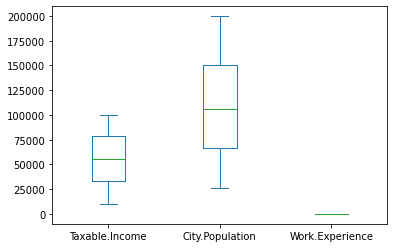

In [541]:
# checked is there any outliers 
data.plot(kind='box')

In [542]:
# check if there any null values 
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
score              0
dtype: int64

In [543]:
# splited into x amd y variables
x=data.iloc[:,:6]
y=data.iloc[:,[-1]]
y

,score
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [544]:
# checked is target fetures are balanced or imbalanced
y.value_counts()

score
Good     476
Risky    124
dtype: int64

In [545]:
# then use the get_dummies to covert categorical data to numerical
x=pd.get_dummies(x)

In [546]:
x

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [547]:
from sklearn.preprocessing import StandardScaler

In [548]:
# used normalization to get values in -3 to +3 range
scaler=StandardScaler()

In [549]:
from sklearn.model_selection import train_test_split

In [550]:
# splitted into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [551]:
# checked the y train data is balanced or imbalanced 
y_train.value_counts()

score
Good     319
Risky     83
dtype: int64

In [552]:
from imblearn.over_sampling import SMOTE

In [553]:
# for imbalanced data we use smote method so the target data will be in balanced 
s_m=SMOTE(random_state=43)
x_train,y_train=s_m.fit_resample(x_train,y_train)

In [554]:
# so you can checked the data get balanced
y_train.value_counts()

score
Good     319
Risky    319
dtype: int64

In [555]:
x_train

array([[-1.32162943, -0.84008659,  1.28646517, ..., -0.79633306,
        -0.97542622,  0.97542622],
       [-0.55151129, -1.15648718,  1.0594419 , ...,  1.25575598,
         1.02519286, -1.02519286],
       [ 0.62669868,  0.61680526, -0.30269769, ..., -0.79633306,
         1.02519286, -1.02519286],
       ...,
       [-1.24286316, -0.01498539, -0.45982906, ...,  1.25575598,
         1.02519286, -1.02519286],
       [-1.19897122,  0.46910722,  0.29421634, ..., -0.79633306,
        -0.97542622,  0.97542622],
       [-1.23118539,  0.90963412,  1.33066803, ..., -0.79633306,
         1.02519286, -1.02519286]])

In [556]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [557]:
# so we used random forest model to get best prediction and also used gridsearch cv so we can get best parameter of model
r_f=RandomForestClassifier(random_state=0,bootstrap=True)
params={'n_estimators':[100,200,300]}
g_v=GridSearchCV(estimator=r_f,param_grid=params,cv=10,n_jobs=-1)
model=g_v.fit(x_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [558]:
# these are the best parameters
model.best_params_

{'n_estimators': 100}

In [559]:
# these is the score
model.best_score_

0.9984375

In [560]:
model.score(x_train,y_train)

1.0

In [561]:
y_pred=model.predict(x_test)

In [562]:
model.score(x_test,y_test)

1.0

In [563]:
from sklearn.metrics import accuracy_score,r2_score,classification_report,confusion_matrix

In [564]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       157
       Risky       1.00      1.00      1.00        41

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198



In [565]:
confusion_matrix(y_pred,y_test)

array([[157,   0],
       [  0,  41]], dtype=int64)

In [566]:
# so as you can see the if we use complex model for simple data the model will get overfitted -->